# Autoencodage

In [2]:
import keras
from keras import layers

** CNN

In [3]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [1]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

** MLP

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
from keras import layers
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(256, activation='relu')(input_img)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(2, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
 dense_6 (Dense)             (None, 64)                192   

** Apprentissage de l'autoencodeur

In [5]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
history=autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0573 - val_loss: 0.0472
Epoch 2/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0451 - val_loss: 0.0434
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0421 - val_loss: 0.0413
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0406 - val_loss: 0.0402
Epoch 5/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0397 - val_loss: 0.0391
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0389 - val_loss: 0.0387
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0385 - val_loss: 0.0384
Epoch 8/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0378 - val_loss: 0.0378
Epoch 9/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0375 - val_loss: 0.0373
Epoch 10/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0370 - val_lo

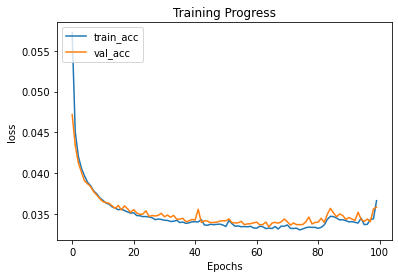

In [7]:
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("loss")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
plot_hist(history)

** Chiffres reconstitués

313/313 [==============================] - 1s 1ms/step


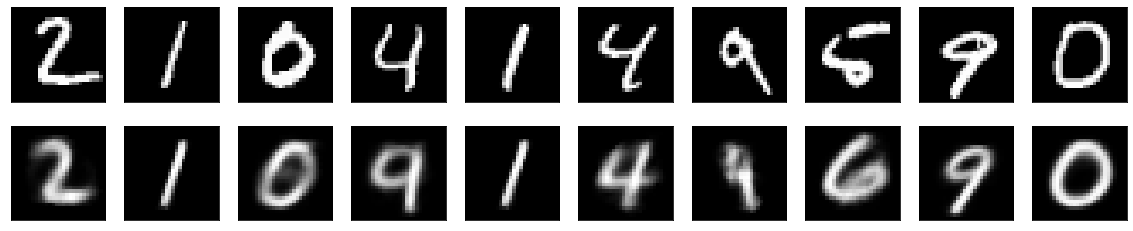

In [8]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1875/1875 [==============================] - 2s 902us/step


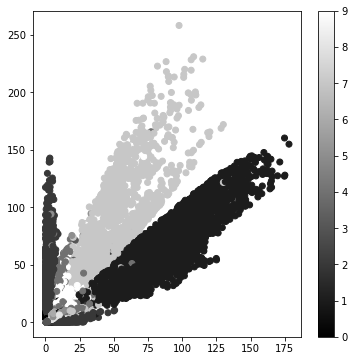

In [9]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train)
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_train)
plt.colorbar()
plt.show()

313/313 [==============================] - 0s 1ms/step


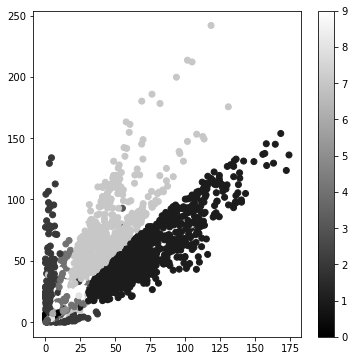

In [10]:
x_test_encoded = encoder.predict(x_test)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()